## Movies Movies Movies Movies 

### Part 1 - Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import ast

import statsmodels.api as sm
import statsmodels.tools

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits
import warnings 
warnings.filterwarnings('ignore')

### Part 2 - Importing the Data

In [2]:
keywords = pd.read_csv("Documents/Capstone/keywords.csv")
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [3]:
keywords.shape

(46419, 2)

In [4]:
credits = pd.read_csv("Documents/Capstone/credits.csv")
credits.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [5]:
ratings = pd.read_csv("Documents/Capstone/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [6]:
links = pd.read_csv("Documents/Capstone/links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
meta = pd.read_csv("Documents/Capstone/movies_metadata.csv")
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Part 3 - Joining DataFrames

In [8]:
links.shape

(45843, 3)

In [9]:
ratings.shape

(26024289, 4)

#### Joining Meta and Credits

In [10]:
meta['id'] = pd.to_numeric(meta['id'], errors= 'coerce')
meta = meta.dropna(subset = ['id'])
meta['id'] = meta['id'].astype(int)
meta.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                         int32
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [11]:
meta = pd.merge(meta, credits, on = 'id', how = 'inner')

In [12]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [13]:
meta.isnull().sum()

adult                        0
belongs_to_collection    41038
budget                       0
genres                       0
homepage                 37746
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25099
title                        3
video                        3
vote_average                 3
vote_count                   3
cast                         0
crew                         0
dtype: int64

#### Links and Ratings

In [14]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [15]:
links = pd.merge(links,ratings, on = 'movieId', how = 'inner')

In [16]:
links.rename(columns = {'imdbId':'imdb_id'},inplace = True)

In [17]:
links.drop(columns = ['timestamp', 'userId' ,'tmdbId'],inplace = True)

In [18]:
links = links.groupby('imdb_id').agg({'imdb_id' : 'first', 'rating': 'mean'}).reset_index(drop = True)

In [19]:
links['rating'] = links['rating'].round(2)

#### Links/Ratings and Meta

In [20]:
meta['imdb_id'] = meta['imdb_id'].str.replace('^tt0','tt', regex = True)

In [21]:
meta['imdb_id'] = meta['imdb_id'].str.replace('^tt','', regex = True)

In [22]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [23]:
meta = meta.dropna(subset = ['imdb_id'])

In [24]:
meta['imdb_id'] = meta['imdb_id'].astype(int)

In [25]:
meta.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                         int32
imdb_id                    int32
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
cast                      object
crew                      object
dtype: object

In [26]:
meta = pd.merge(meta,links, on = 'imdb_id', how = 'inner')

In [27]:
meta.sort_values(by= 'imdb_id')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,rating
43055,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,16612,1,en,Carmencita,The first woman to appear in front of an Ediso...,...,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Carmencita,False,4.9,18.0,"[{'cast_id': 1, 'character': 'Herself', 'credi...","[{'credit_id': '52fe46de9251416c75086305', 'de...",1.67
31935,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 16, 'nam...",NaN,88013,3,fr,Pauvre Pierrot,"One night, Arlequin come to see his lover Colo...",...,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Poor Pierrot,False,6.1,19.0,[],"[{'credit_id': '52fe49e69251416c910bc797', 'de...",2.50
19137,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,16624,5,xx,Blacksmith Scene,Three men hammer on an anvil and pass a bottle...,...,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Blacksmith Scene,False,5.8,19.0,"[{'cast_id': 3, 'character': '', 'credit_id': ...","[{'credit_id': '52fe46e19251416c750868df', 'de...",2.72
17580,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,105158,8,en,Edison Kinetoscopic Record of a Sneeze,A man (Thomas Edison's assistant) takes a pinc...,...,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Edison Kinetoscopic Record of a Sneeze,False,4.7,12.0,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4a48c3a36847f81c52bf', 'de...",2.42
25738,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,774,10,fr,La Sortie de l'Usine Lumière à Lyon,Working men and women leave the Lumière factor...,...,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Workers Leaving the Lumière Factory,False,6.2,52.0,[],"[{'credit_id': '54d0f9829251417c1d00348f', 'de...",3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44452,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,462108,7068896,en,Chris D'Elia: Man on Fire,Unbridled comic Chris D'Elia reconsiders his a...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Chris D'Elia: Man on Fire,False,5.8,6.0,"[{'cast_id': 0, 'character': 'Himself', 'credi...","[{'credit_id': '5943b7d6c3a3686c8101f7b6', 'de...",3.50
44473,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",https://www.youtube.com/watch?v=pKWB-MVJ4sQ,464111,7078780,en,Zygote,"Stranded in an Arctic mine, two survivors are ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Zygote,False,7.2,28.0,"[{'cast_id': 0, 'character': 'Barkley', 'credi...","[{'credit_id': '595796d89251410c89009c3d', 'de...",3.58
44244,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",https://www.youtube.com/watch?v=Tm0V24IEHao,463800,7078926,en,Firebase,"Set during the Vietnam war, Firebase follows A...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Firebase,False,7.3,28.0,"[{'cast_id': 6, 'character': 'SGT. Hines', 'cr...","[{'credit_id': '59540b9fc3a368151c0385f3', 'de...",4.15
44359,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,464207,7104950,en,The Truth Is in the Stars,"William Shatner sits down with scientists, inn...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Truth Is in the Stars,False,7.5,2.0,"[{'cast_id': 0, 'character': 'Himself', 'credi...","[{'credit_id': '59597839c3a36828a1032289', 'de...",3.50


#### Keywords and Meta

In [28]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [29]:
meta = pd.merge(meta,keywords, on = 'id', how = 'inner')

In [30]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,cast,crew,rating,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",3.89,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",3.24,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",3.18,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",2.88,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",3.08,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


### Part 4 - Cleaning

#### Inspection

In [31]:
meta.shape

(45802, 28)

In [32]:
meta.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                         int32
imdb_id                    int32
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
cast                      object
crew                      object
rating                   float64
keywords                  object
dtype: object

#### Dropping Columns

In [33]:
meta.drop(columns = ['belongs_to_collection', 'homepage', 'tagline', 'original_title', 'video',], inplace = True)

In [34]:
meta.isnull().sum()

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language        11
overview                974
popularity                4
poster_path             378
production_companies      4
production_countries      4
release_date             80
revenue                   4
runtime                 263
spoken_languages          4
status                   83
title                     4
vote_average              4
vote_count                4
cast                      0
crew                      0
rating                    0
keywords                  0
dtype: int64

In [35]:
meta.head()

,adult,budget,genres,id,imdb_id,original_language,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,rating,keywords
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",3.89,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",3.24,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",3.18,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",2.88,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",3.08,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [36]:
meta.drop(columns = ['adult'], inplace = True)

In [37]:
meta.head()

,budget,genres,id,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,...,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,rating,keywords
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",3.89,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",3.24,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",3.18,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",2.88,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",3.08,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [38]:
meta.drop(columns = ['id' , 'imdb_id'], inplace = True)

#### Movies df

In [39]:
movies = meta.copy()

In [40]:
movies.dtypes

budget                   object
genres                   object
original_language        object
overview                 object
popularity               object
poster_path              object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
title                    object
vote_average            float64
vote_count              float64
cast                     object
crew                     object
rating                  float64
keywords                 object
dtype: object

##### Release date

In [41]:
movies['release_date'] = pd.DatetimeIndex(movies['release_date']).year

In [42]:
movies = movies.dropna(subset = ['release_date'])

In [43]:
movies['release_date'].astype(int)

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45796    1995
45797    1991
45799    2011
45800    2003
45801    1917
Name: release_date, Length: 45722, dtype: int32

In [44]:
movies.head()

,budget,genres,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,rating,keywords
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",3.89,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",3.24,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",3.18,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",2.88,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",3.08,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [45]:
movies.rename({'release_date':'release_year'})

,budget,genres,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,rating,keywords
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",3.89,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",3.24,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",3.18,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",2.88,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",3.08,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45796,0,"[{'id': 878, 'name': 'Science Fiction'}]",en,It's the year 3000 AD. The world's most danger...,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Caged Heat 3000,3.5,1.0,"[{'cast_id': 1, 'character': 'Kira (as Cassand...","[{'credit_id': '5757f36ac3a3687d6f000e8a', 'de...",2.00,[]
45797,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",en,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991.0,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Robin Hood,5.7,26.0,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...","[{'credit_id': '52fe44439251416c9100a899', 'de...",4.00,[]
45799,0,"[{'id': 18, 'name': 'Drama'}]",tl,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_

##### Dropping

In [46]:
movies.head(3)

,budget,genres,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,rating,keywords
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",3.89,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",3.24,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",3.18,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [47]:
movies.head(3)

,budget,genres,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,rating,keywords
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",3.89,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",3.24,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",3.18,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


##### Dictionaries

In [48]:
movies['genres'] = movies['genres'].apply(lambda x: ast.literal_eval(x))
movies['genres'] = movies['genres'].apply(lambda x: [genre['name'] for genre in x])

# movies['keywords'] = movies['keywords'].apply(lambda x: ast.literal_eval(x))
# movies['keywords'] = movies['keywords'].apply(lambda x: [genre['name'] for genre in x])

# movies['production_companies'] = movies['production_companies'].apply(lambda x: ast.literal_eval(x))
# movies['production_companies'] = movies['production_companies'].apply(lambda x: [genre['name'] for genre in x])

# movies['production_countries'] = movies['production_countries'].apply(lambda x: ast.literal_eval(x))
# movies['production_countries'] = movies['production_countries'].apply(lambda x: [genre['name'] for genre in x])

# movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: ast.literal_eval(x))
# movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: [genre['name'] for genre in x])

# movies['crew'] = movies['crew'].apply(lambda x: ast.literal_eval(x))
# movies['crew'] = movies['crew'].apply(lambda x: [genre['name'] for genre in x])

# movies['cast'] = movies['cast'].apply(lambda x: ast.literal_eval(x))
# movies['cast'] = movies['cast'].apply(lambda x: [genre['name'] for genre in x])

In [49]:
movies.head()

,budget,genres,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,rating,keywords
0,30000000,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",3.89,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000,"[Adventure, Fantasy, Family]",en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",3.24,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,"[Romance, Comedy]",en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",3.18,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,16000000,"[Comedy, Drama, Romance]",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",2.88,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,0,[Comedy],en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",3.08,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [50]:
# movies = movies.drop(columns =['overview' , 'poster_path' , 'original_language', 'crew', 'keywords', 'title', 'production_companies', 'production_countries'])
# movies.drop(columns = ['status', 'spoken_languages'] , inplace = True)

In [51]:
unique_genres = set(genre for sublist in movies['genres'] for genre in sublist)
for genre in unique_genres:
    movies[genre] = 0
for index, row in movies.iterrows():
    for genre in row['genres']:
        movies.at[index, genre] = 1

# movies['cast'] = movies['cast'].apply(lambda x:x[:2])

# unique_actors = set(actor for sublist in movies['cast'] for actor in sublist)
# for actor in unique_actors:
#     movies[actor] = 0
# for index, row in movies.iterrows():
#     for actor in row['cast']:
#         movies.at[index, actor] = 1

In [52]:
movies.head()

,budget,genres,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,...,Romance,Music,Foreign,Western,Action,Drama,Horror,Comedy,Crime,Mystery
0,30000000,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,373554033.0,...,0,0,0,0,0,0,0,1,0,0
1,65000000,"[Adventure, Fantasy, Family]",en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,262797249.0,...,0,0,0,0,0,0,0,0,0,0
2,0,"[Romance, Comedy]",en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,16000000,"[Comedy, Drama, Romance]",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,81452156.0,...,1,0,0,0,0,1,0,1,0,0
4,0,[Comedy],en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,76578911.0,...,0,0,0,0,0,0,0,1,0,0


##### Object Columns

In [53]:
movies['budget'] = movies['budget'].astype(int)

In [54]:
movies['popularity'] = movies['popularity'].astype(float)

In [55]:
movies.head()

,budget,genres,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,...,Romance,Music,Foreign,Western,Action,Drama,Horror,Comedy,Crime,Mystery
0,30000000,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,373554033.0,...,0,0,0,0,0,0,0,1,0,0
1,65000000,"[Adventure, Fantasy, Family]",en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,262797249.0,...,0,0,0,0,0,0,0,0,0,0
2,0,"[Romance, Comedy]",en,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,16000000,"[Comedy, Drama, Romance]",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,81452156.0,...,1,0,0,0,0,1,0,1,0,0
4,0,[Comedy],en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,76578911.0,...,0,0,0,0,0,0,0,1,0,0


#### Null Handling

In [56]:
movies = movies.dropna(subset = 'runtime')

In [57]:
movies.dtypes

budget                    int32
genres                   object
original_language        object
overview                 object
popularity              float64
poster_path              object
production_companies     object
production_countries     object
release_date            float64
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
title                    object
vote_average            float64
vote_count              float64
cast                     object
crew                     object
rating                  float64
keywords                 object
War                       int64
Family                    int64
Fantasy                   int64
Thriller                  int64
Animation                 int64
Science Fiction           int64
Adventure                 int64
Documentary               int64
TV Movie                  int64
History                   int64
Romance                   int64
Music   

In [58]:
movies1 =movies.copy()

In [59]:
movies1.head()

,budget,genres,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,...,Romance,Music,Foreign,Western,Action,Drama,Horror,Comedy,Crime,Mystery
0,30000000,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,373554033.0,...,0,0,0,0,0,0,0,1,0,0
1,65000000,"[Adventure, Fantasy, Family]",en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,262797249.0,...,0,0,0,0,0,0,0,0,0,0
2,0,"[Romance, Comedy]",en,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,16000000,"[Comedy, Drama, Romance]",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,81452156.0,...,1,0,0,0,0,1,0,1,0,0
4,0,[Comedy],en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995.0,76578911.0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
# file_path = 'movies1.xlsx'
# movies1.to_excel(file_path, index = False)
# movies1.head()

In [61]:
movies = movies.drop(columns =['overview' , 'poster_path' , 'original_language', 'crew', 'keywords', 'title', 'production_companies', 'production_countries'])
movies.drop(columns = ['status', 'spoken_languages'] , inplace = True)

In [62]:
movies.drop(columns = ['cast', 'genres'], inplace = True)

### Part 5 - Clustering

In [63]:
movies.isnull().sum().sum()

0

In [107]:
movies.columns

Index(['budget', 'popularity', 'release_date', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'rating', 'War', 'Family', 'Fantasy',
       'Thriller', 'Animation', 'Science Fiction', 'Adventure', 'Documentary',
       'TV Movie', 'History', 'Romance', 'Music', 'Foreign', 'Western',
       'Action', 'Drama', 'Horror', 'Comedy', 'Crime', 'Mystery', 'cluster'],
      dtype='object')

In [65]:
feature_cols = ['vote_average',  'History', 'Action', 'Mystery',
       'Western', 'Music', 'Thriller', 'Romance', 'TV Movie', 'War', 'Comedy',
       'Drama', 'Adventure', 'Crime', 'Science Fiction', 'Horror', 'Foreign',
       'Documentary', 'Family', 'Fantasy', 'Animation']

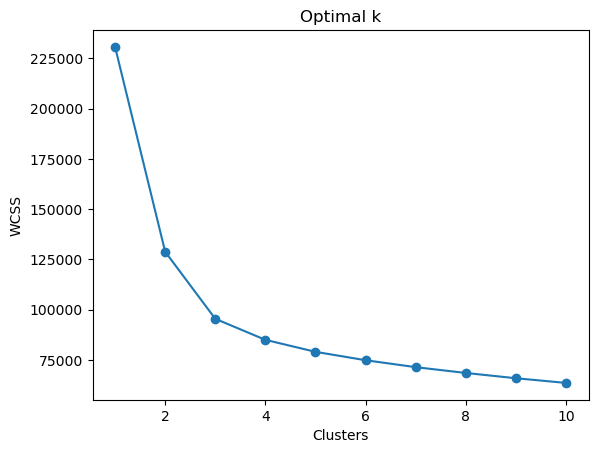

In [124]:
k_values = range(1, 11)
wcss = [] 
for k in k_values:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(movies[feature_cols])
    wcss.append(kmeans.inertia_) 

x = plt.plot(k_values, wcss, marker='o') 
plt.xlabel('Clusters') 
plt.ylabel('WCSS') 
plt.title('Optimal k')

plt.show()

In [126]:
fig = x[0].get_figure()
fig.savefig('Optimal_k.png')

In [109]:
# data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(movies[feature_cols])
 

In [110]:
df.shape

(45474, 2)

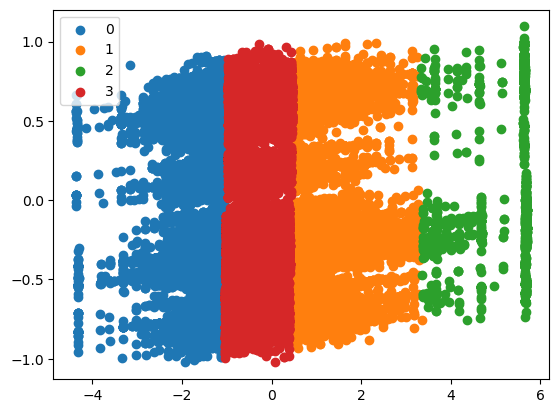

In [127]:
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()

plt.savefig('clusters.png')

plt.show()


In [ ]:
fig2 = y[0].get_figure()
fig2.savefig('Clusters.png')

In [133]:
silhouette_avg = silhouette_score(movies[feature_cols], label)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18698258793693226


In [115]:
movies1['cluster'] = label

In [116]:
movies1['cluster'].value_counts()

cluster
3    20053
0    12753
2     9595
1     3073
Name: count, dtype: int64

In [146]:
movies1.shape

(45474, 23)

In [85]:
# movies1.drop(columns = ['budget', 'genres', 'original_language', 'overview', 'popularity',
#        'poster_path', 'production_companies', 'production_countries',
#        'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'vote_count', 'cast', 'crew', 'rating', 'keywords'], inplace =True)

In [86]:
movies1.columns

Index(['title', 'vote_average', 'War', 'Family', 'Fantasy', 'Thriller',
       'Animation', 'Science Fiction', 'Adventure', 'Documentary', 'TV Movie',
       'History', 'Romance', 'Music', 'Foreign', 'Western', 'Action', 'Drama',
       'Horror', 'Comedy', 'Crime', 'Mystery', 'cluster'],
      dtype='object')

### Part 6 - Function

In [142]:
def recommender(movies1):

    user_input = input("Please enter a film(case sensitive): ")

    if user_input not in movies1['title'].values:
        return print("Error: Film not found.")

    user_film_cluster = movies1.loc[movies1['title'] == user_input, 'cluster'].iloc[0]
    
    similar_films_cluster = movies1[movies1['cluster'] == user_film_cluster]

    distances = []
    for _, row in similar_films_cluster.iterrows():
        dist = distance.euclidean(movies1.drop(columns=['title', 'cluster']).loc[movies1['title'] == user_input].values[0],
                                  row.drop(labels=['title' , 'cluster']).values)
        distances.append(dist)
    
    similar_films_cluster['Distance'] = distances
    
    similar_films_cluster.sort_values(by='Distance', inplace=True)
    
    recommended_films = similar_films_cluster.iloc[1:6]['title'].tolist()
    
    return recommended_films

### Let's see it in action!!

In [151]:
recommender(movies1)

Please enter a film(case sensitive):  Apocalypto


['The Count of Monte Cristo',
 'When Time Ran Out...',
 'Emperor of the North',
 'Skyjacked',
 'The Wilby Conspiracy']